# Dimensionality Reduction

## Linear data

Now we will use different methods of dimensionalty reduction using some specific examples.

The first one consists of three spherical blobs with different variances.

<IPython.core.display.Javascript object>


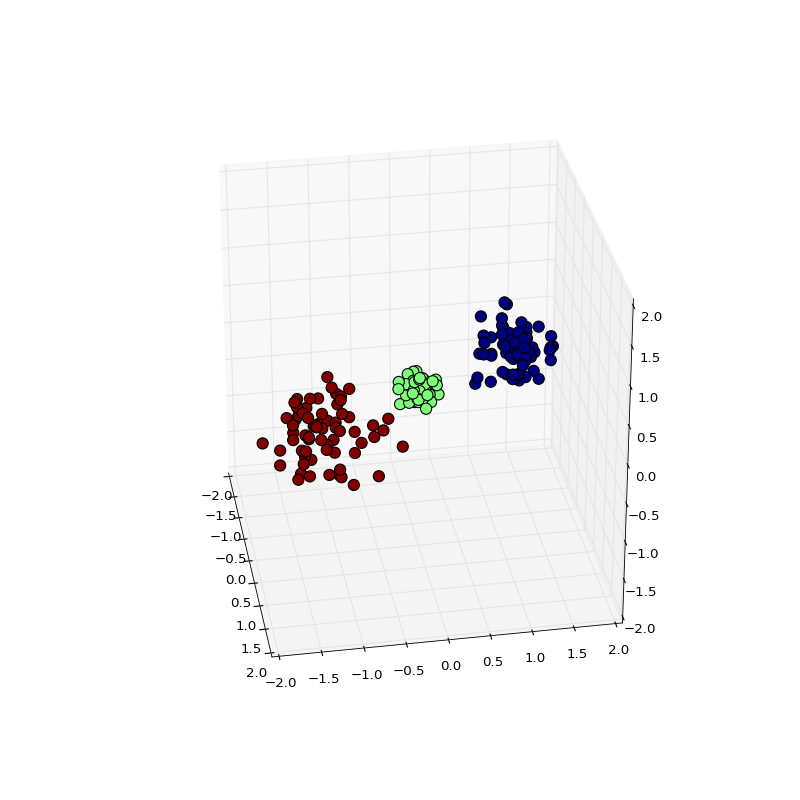

In [1]:
from pylab import *
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from amltlearn.datasets import make_blobs
%matplotlib notebook

blobs, labels = make_blobs(n_samples=200, n_features=3, centers=[[1,1,1],[0,0,0],[-1,-1,-1]], cluster_std=[0.2,0.1,0.3])

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')
plt.scatter(blobs[:, 0], blobs[:, 1], zs=blobs[:, 2], depthshade=False, c=labels, s=100)
plt.show()

Computing PCA we can see that just one component explains almost all the variance.

[ 0.95298131  0.02496345  0.02205524]


<IPython.core.display.Javascript object>


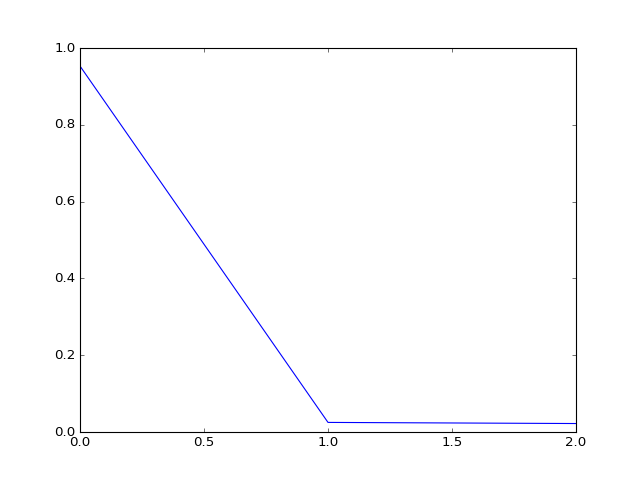

In [3]:
pca = PCA()
fdata = pca.fit_transform(blobs)

print (pca.explained_variance_ratio_)

fig = plt.figure()

plt.plot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.show()

And as we can expect representing the PCA transformed data we can see that just one dimension is enough

<IPython.core.display.Javascript object>


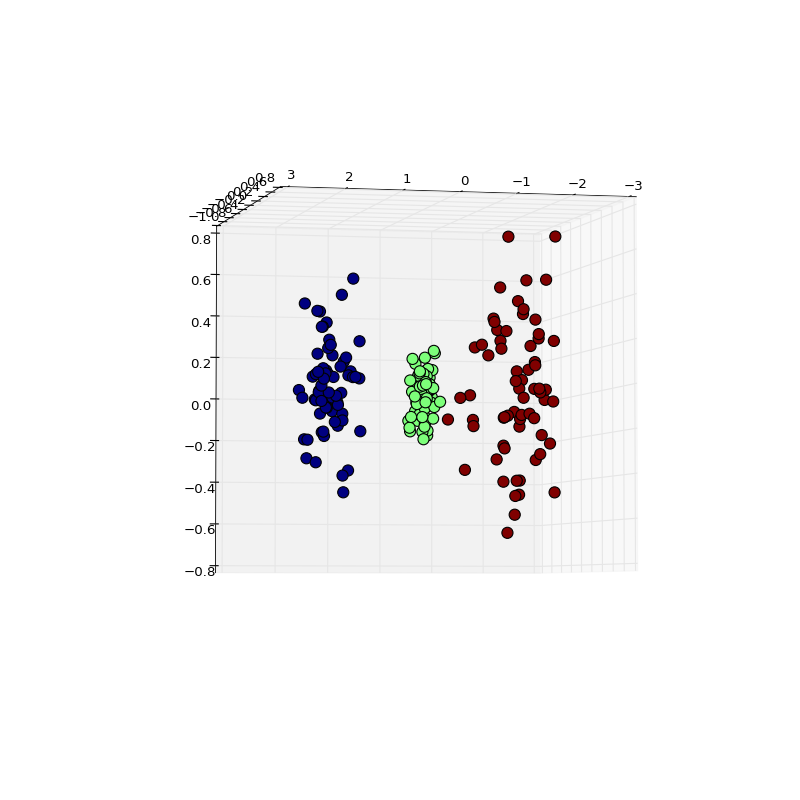

In [5]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(0, 90)
plt.scatter(fdata[:, 0], fdata[:, 1], zs=fdata[:, 2], depthshade=False, c=labels,s=100)

plt.show()

<IPython.core.display.Javascript object>


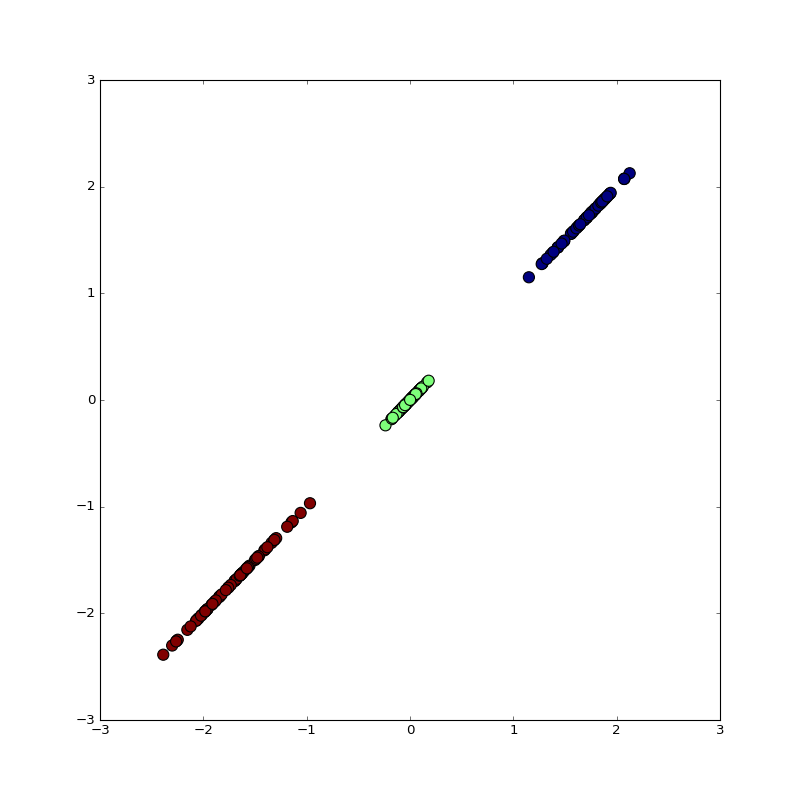

In [6]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.scatter(fdata[:, 0], fdata[:, 0], c=labels,s=100)

plt.show()

Using nonlinear transformations to linearly separable data sometimes has weird consequences.

First we see what happens using ISOMAP

<IPython.core.display.Javascript object>


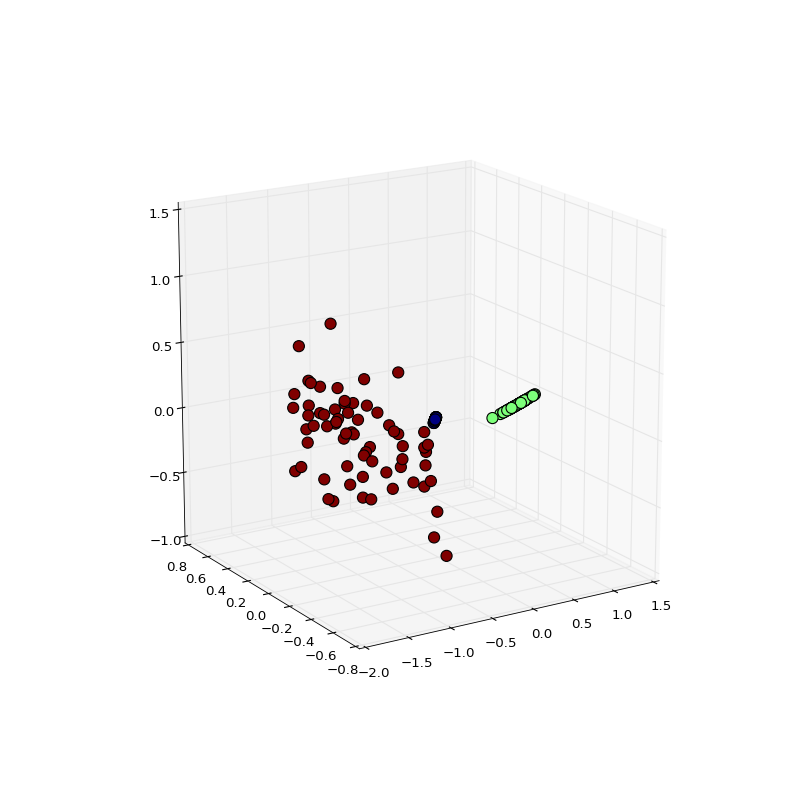

In [7]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=3, n_neighbors=20)
fdata = iso.fit_transform(blobs)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(90, 90)
plt.scatter(fdata[:, 0], fdata[:, 1], zs= fdata[:, 2], depthshade=False, c=labels, s=100)

plt.show()

Changing the number of neigbors can change radically the result, but as they increase the transformation is equivalent to PCA

Now for Locally Linear Embedding

<IPython.core.display.Javascript object>


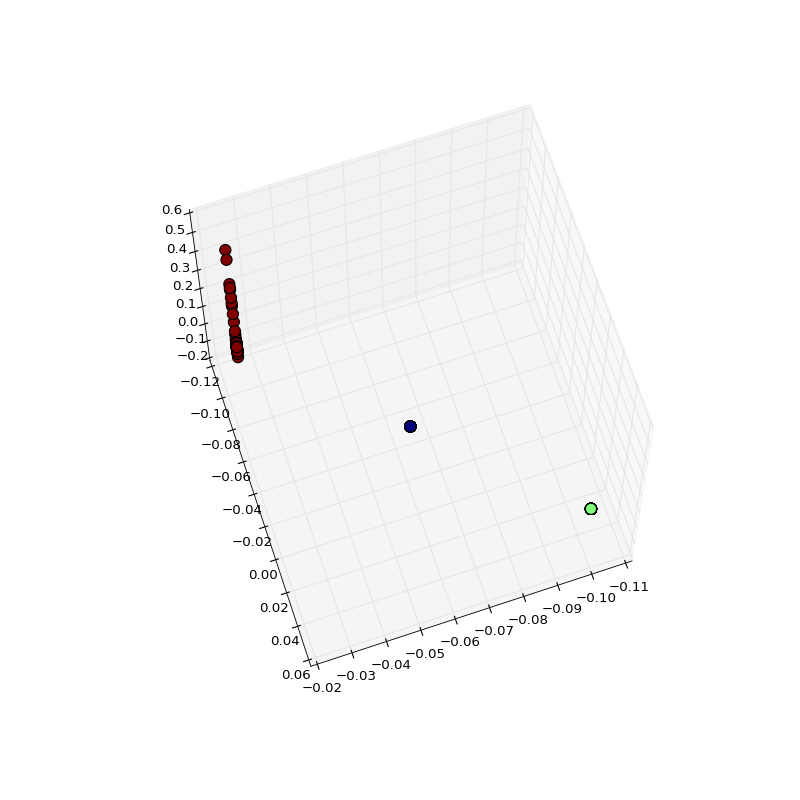

In [8]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_neighbors=5, n_components=3, method='standard')
fig = plt.figure(figsize=(10,10))
fdata = lle.fit_transform(blobs)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(90, 90)
plt.scatter(fdata[:, 0], fdata[:, 1], zs= fdata[:, 2], depthshade=False, c=labels, s=100)

plt.show()

Playing with the number of neigbors you will see the same effect on this method

## Nonlinear data

Now we will play with non linearly separable data. First the two moons dataset.

<IPython.core.display.Javascript object>


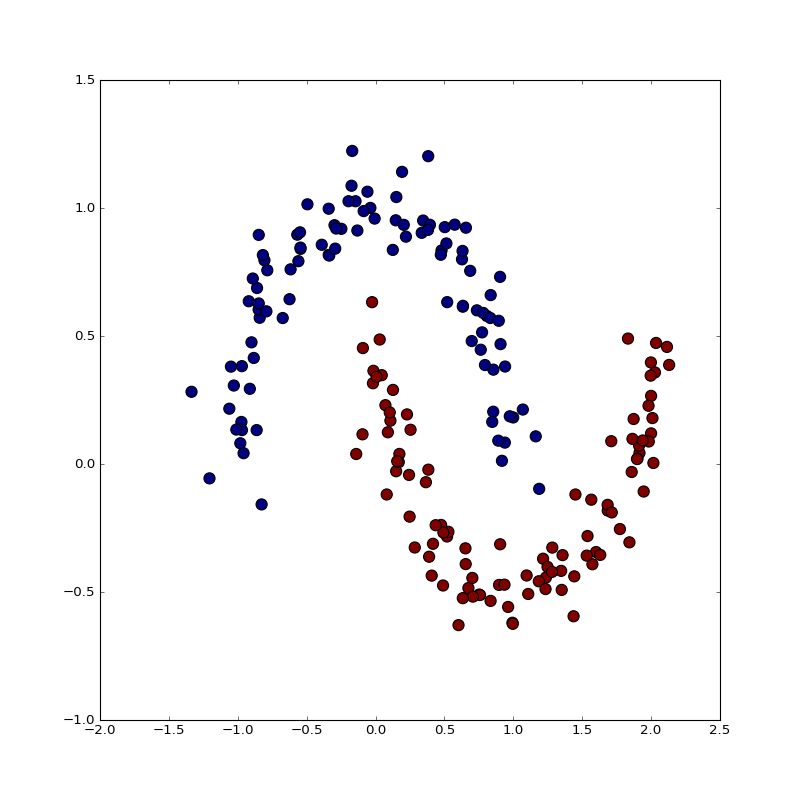

In [9]:
from sklearn.datasets import make_moons
moons, labels = make_moons(n_samples=200, noise=0.1)

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)
plt.scatter(moons[:, 0], moons[:, 1], c=labels, s=100)
plt.show()

PCA assigns most of the variance to the fist component, but the second one has still a significan amount

[ 0.82135406  0.17864594]


<IPython.core.display.Javascript object>


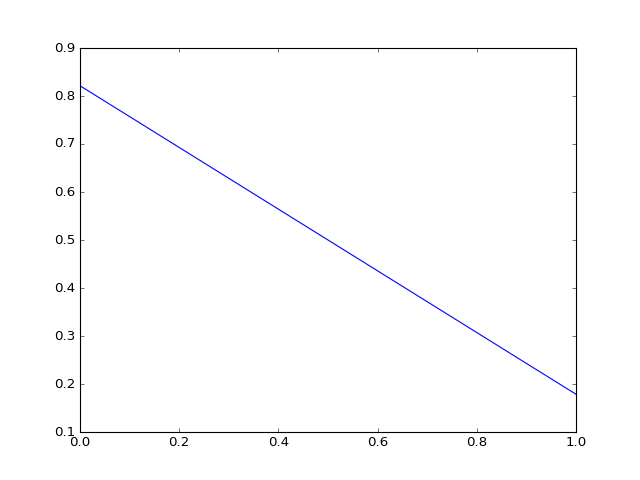

In [10]:
pca = PCA()
fdata = pca.fit_transform(moons)

print(pca.explained_variance_ratio_)

fig = plt.figure()

plt.plot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.show()

And PCA does not seems to have much effect on the data

<IPython.core.display.Javascript object>


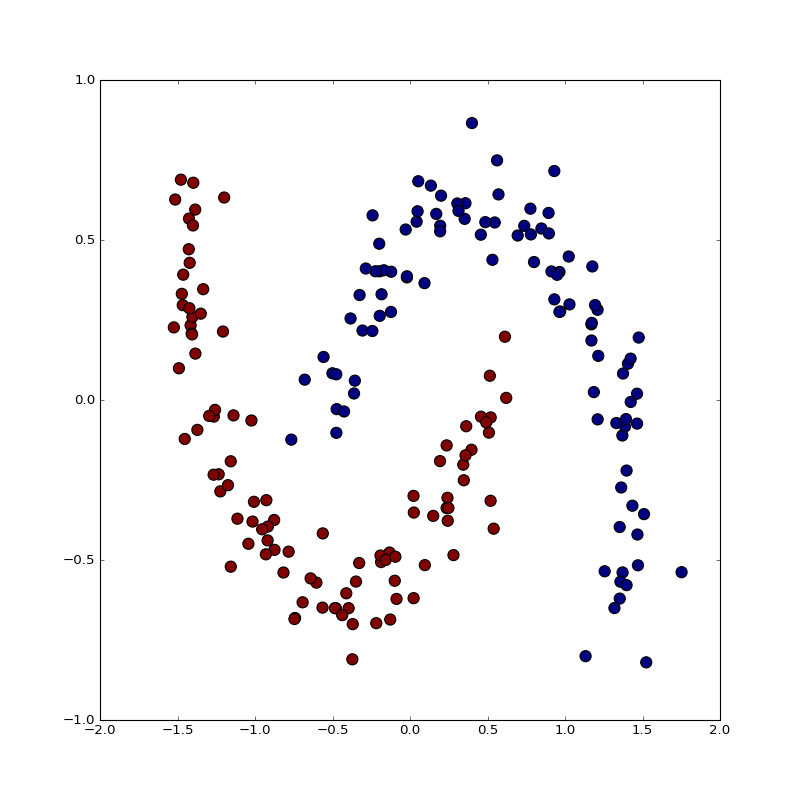

In [11]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.scatter(fdata[:, 0], fdata[:, 1], c=labels,s=100)

plt.show()

ISOMAP does a better job, but adjusting an adequate of neighbors to sparate the two moons requires some experimentation. Playing with the number of neighbors will results on different shapes that will converge on the original data for large values

<IPython.core.display.Javascript object>


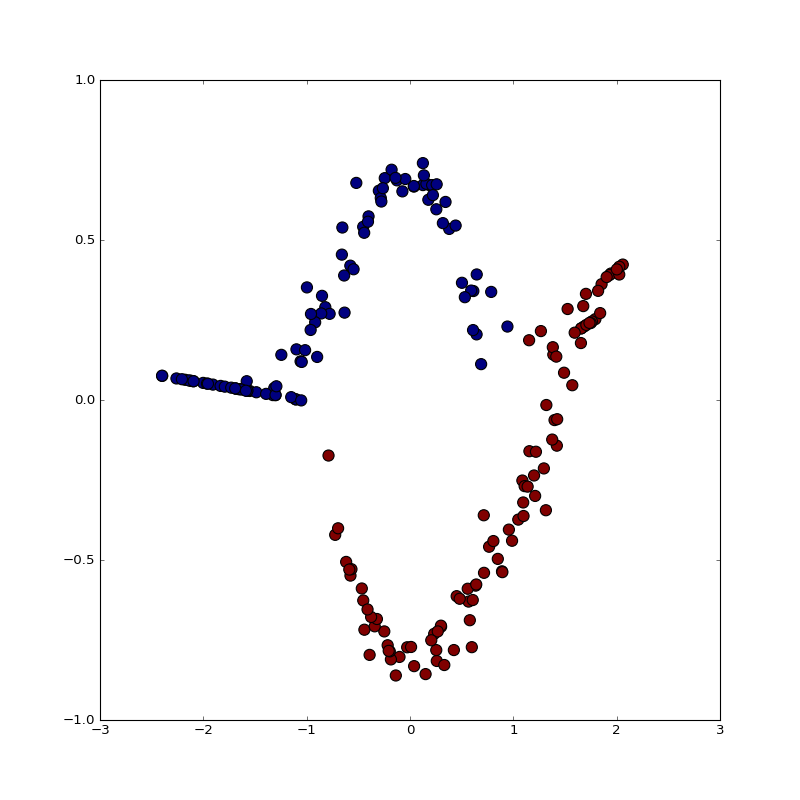

In [12]:
iso = Isomap(n_components=2, n_neighbors= 11)
fdata = iso.fit_transform(moons)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

plt.scatter(fdata[:, 0], fdata[:, 1], c=labels, s=100)

plt.show()

LLE also allows  separating both moons resulting in very different transformations depending on the number of neighbors.

<IPython.core.display.Javascript object>


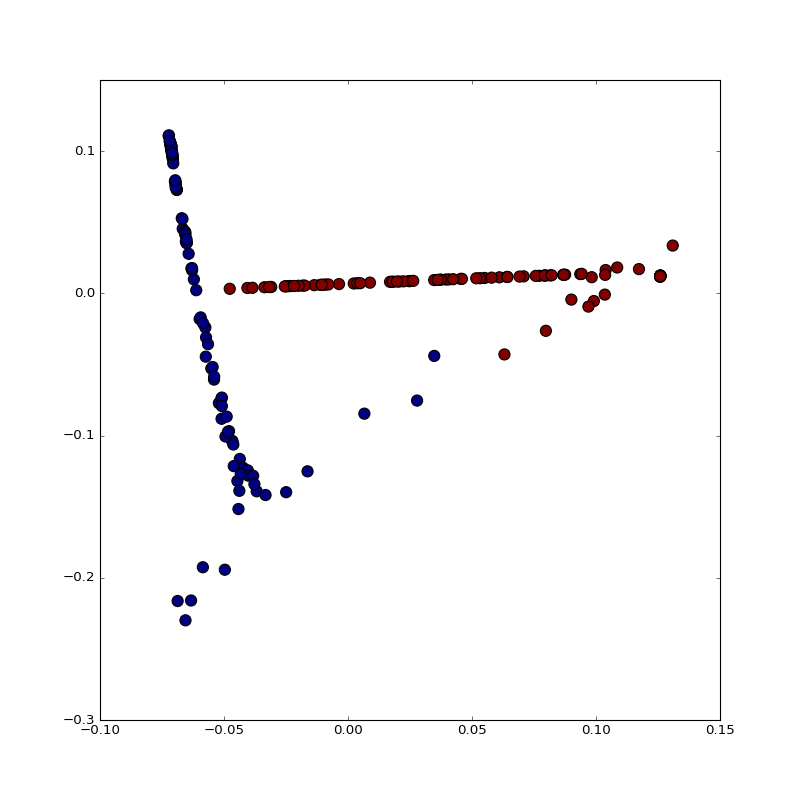

In [13]:
lle = LocallyLinearEmbedding(n_neighbors=7, n_components=2, method='standard', random_state=0)
fig = plt.figure(figsize=(10,10))
fdata = lle.fit_transform(moons)
ax = fig.add_subplot(111)

plt.scatter(fdata[:, 0], fdata[:, 1],  c=labels, s=100)

plt.show()

In [14]:
print (lle.reconstruction_error_)

3.05072165844e-08
